# Comprehensive Analyzer Plots Example
This notebook demonstrates all available plotting methods in the `DwtAnalyzer` class from the `tbsim` package. It is adapted from the original Python script for interactive exploration.

In [5]:
import tbsim as mtb
import starsim as ss
import sciris as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
TBS = mtb.TBS

/Users/mine/git/tbdocs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Build a TB simulation with dwell time analyzer

In [6]:
def build_tbsim(sim_pars=None):
    sim_params = dict(
        start = sc.date('2013-01-01'),
        stop = sc.date('2016-12-31'),
        rand_seed=123,
        unit='day',
        dt=7,
    )
    if sim_pars is not None:
        sim_params.update(sim_pars)
    pop = ss.People(n_agents=1000)
    tb_params = dict(
        beta=ss.rate_prob(0.0025),
        init_prev=ss.bernoulli(p=0.25),
        rel_sus_latentslow=0.1,
        unit='day'
    )
    tb = mtb.TB(tb_params)
    net = ss.RandomNet(dict(n_contacts=ss.poisson(lam=5), dur=0))
    dwell_analyzer = mtb.DwtAnalyzer(adjust_to_unit=True, unit=1.0, scenario_name='comprehensive_plots_example')
    sim = ss.Sim(
        people=pop,
        networks=net,
        diseases=tb,
        pars=sim_params,
        analyzers=dwell_analyzer,
    )
    sim.pars.verbose = 30/365
    return sim

## Run the simulation and extract the analyzer

In [7]:
print("Building and running TB simulation...")
sim_tb = build_tbsim()
sim_tb.run()
analyzer = sim_tb.analyzers[0]

Building and running TB simulation...
No dwell time data available to plot.
No data provided, or data is corrupted
Initializing sim with 1000 agents
  Running 2013.01.01 ( 0/209) (0.00 s)  ———————————————————— 0%
  Running 2013.03.26 (12/209) (0.03 s)  •——————————————————— 6%
  Running 2013.06.18 (24/209) (0.06 s)  ••—————————————————— 12%
  Running 2013.09.10 (36/209) (0.09 s)  •••————————————————— 18%
  Running 2013.12.03 (48/209) (0.11 s)  ••••———————————————— 23%
  Running 2014.02.25 (60/209) (0.14 s)  •••••——————————————— 29%
  Running 2014.05.20 (72/209) (0.16 s)  ••••••—————————————— 35%
  Running 2014.08.12 (84/209) (0.19 s)  ••••••••———————————— 41%
  Running 2014.11.04 (96/209) (0.21 s)  •••••••••——————————— 46%
  Running 2015.01.27 (108/209) (0.24 s)  ••••••••••—————————— 52%
  Running 2015.04.21 (120/209) (0.27 s)  •••••••••••————————— 58%
  Running 2015.07.14 (132/209) (0.29 s)  ••••••••••••———————— 64%
  Running 2015.10.06 (144/209) (0.32 s)  •••••••••••••——————— 69%
  Ru

## 1. Sankey Diagrams
Demonstrate Sankey diagrams for state transitions.

In [8]:
# Basic Sankey diagram for all agents
analyzer.sankey_agents()


In [9]:

# Sankey diagram with dwell times
analyzer.sankey_dwelltimes(subtitle="State Transitions with Dwell Times")


In [10]:

# Sankey diagrams by age groups
analyzer.sankey_agents_by_age_subplots(bins=[0, 5, 15, 30, 50, 200], scenario="Age-stratified Analysis")


In [11]:

# Sankey diagrams with even age ranges
analyzer.sankey_agents_even_age_ranges(number_of_plots=3, scenario="Even Age Distribution")

## 2. Network Graphs
Visualize state transition networks.

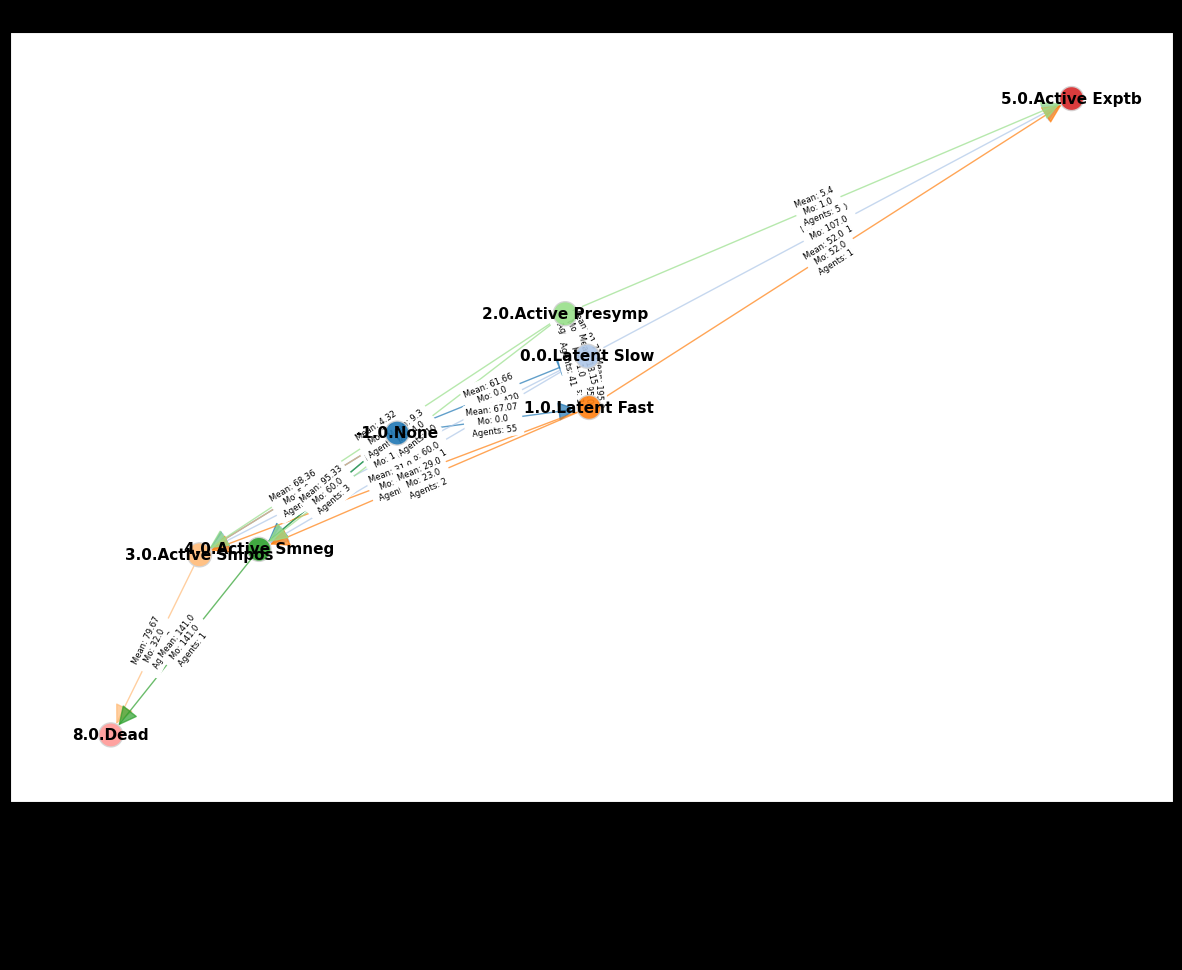

In [12]:
analyzer.graph_state_transitions(subtitle="State Transition Network", colormap='tab20')


<Figure size 1500x1000 with 0 Axes>

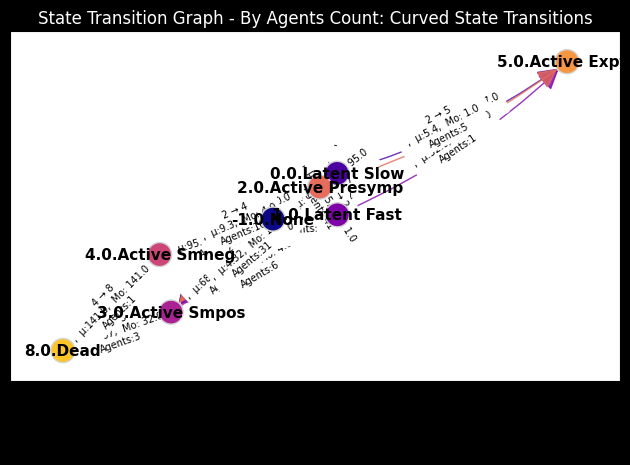

In [15]:

analyzer.graph_state_transitions_curved(subtitle="Curved State Transitions", colormap='plasma')

## 3. Histograms and Distributions
Explore dwell time distributions.

In [17]:
help(analyzer.histogram_with_kde)



Help on method histogram_with_kde in module tbsim.analyzers:

histogram_with_kde(subtitle='') method of tbsim.analyzers.DwtAnalyzer instance
    Create histograms with kernel density estimation for dwell time distributions.

    Generates a multi-panel visualization showing the distribution of dwell
    times for each state, including both histograms and kernel density
    estimation curves. This provides both discrete and continuous views
    of the dwell time distributions.

    Mathematical Model:
        For each state i:
        - Extract dwell times: T_i = {dwell_time for state i}
        - Create histogram: H_i(bin) = count(T_i in bin)
        - Calculate KDE: KDE_i(t) = Σ(K(t-t_j, h)) / (n*h)
            where K is kernel function, h is bandwidth, n = |T_i|
        - Plot: histogram + KDE curve

    Args:
        subtitle (str): Additional subtitle for the plot

    Returns:
        None: Displays matplotlib subplot figure

    Example:
    ```python
    plotter = DwtPlotter(fi

## 4. Interactive Bar Charts
Interactive bar charts for state transitions and reinfections.

In [14]:
analyzer.barchar_all_state_transitions_interactive(
    dwell_time_bins=[0, 30, 90, 180, 365, float('inf')],
    filter_states=['-1.0.None', '0.0.Latent Slow', '1.0.Latent Fast', '2.0.Active Presymp']
)



OverflowError: cannot convert float infinity to integer

In [ ]:

analyzer.reinfections_age_bins_bars_interactive(
    target_states=[0.0, 1.0],
    barmode='group',
    scenario="Age-stratified Reinfection Analysis"
)


In [ ]:
analyzer.reinfections_percents_bars_interactive(
    target_states=[0.0, 1.0],
    scenario="Population Reinfection Analysis"
)

analyzer.reinfections_bystates_bars_interactive(
    target_states=[0.0, 1.0],
    scenario="State Transition Reinfection Analysis",
    barmode='group'
)

## 5. Stacked Bar Charts
Stacked bar charts for cumulative time and dwell time analysis.

In [ ]:
analyzer.stacked_bars_states_per_agent_static()
analyzer.stackedbars_dwelltime_state_interactive(bin_size=5, num_bins=15)
analyzer.stackedbars_subplots_state_transitions(bin_size=2, num_bins=25)

## 6. Custom Transition Analysis
Custom transition subplots.

In [ ]:
custom_transitions = {
    '-1.0.None': ['0.0.Latent Slow', '1.0.Latent Fast'],
    '0.0.Latent Slow': ['2.0.Active Presymp', '-1.0.None'],
    '1.0.Latent Fast': ['2.0.Active Presymp', '-1.0.None']
}
analyzer.subplot_custom_transitions(transitions_dict=custom_transitions)

## 7. Survival Analysis
Kaplan-Meier survival curve for dwell times.

In [ ]:
analyzer.plot_kaplan_meier(dwell_time_col='dwell_time')

## 8. Using DwtPlotter Directly
Demonstrate additional plots using the DwtPlotter class.

In [ ]:
file_path = analyzer.file_path
print(f'Generated data file: {file_path}')
plotter = mtb.DwtPlotter(file_path=file_path)
plotter.histogram_with_kde(subtitle="From Generated File")
plotter.sankey_agents(subtitle="From Generated File")

## 9. Post Processor Demonstration
Example usage of the DwtPostProcessor for multiple simulation results. (This is informational; actual usage requires multiple result files.)

In [ ]:
# Example usage (commented out):
# postproc = mtb.DwtPostProcessor(directory='results', prefix='Baseline')
# postproc.sankey_agents(subtitle="Aggregated Results")
# postproc.histogram_with_kde(subtitle="Aggregated Distributions")
# postproc.reinfections_percents_bars_interactive(
#     target_states=[0.0, 1.0],
#     scenario="Aggregated Reinfection Analysis"
# )